# Project T5 Bootcamp
## Diamonds Dataset
### The resource https://www.kaggle.com/shivam2503/diamonds

### Problems:
Predict the price of diamonds

### Solutions:

### Dataset:
I will be using "diamonds.csv" data set that contains 10 columns and 53,940 rows.<br>
#### Dataset Story:
The dataset has a story about diamonds, for each data has a story that is its price, its weight, its quality, its color, how it is clear, its dimensions, its total depth percentage, and width of the top of the diamond<br>
<br>
#### Columns Stories:
- carat: weight of the diamond <br>
- price: in US dollars <br>
- cut: quality of the cut [Fair, Good, Very Good, Premium, Ideal]<br>
- color: diamond color, from [D (best), E, F, G, H, I, J (worst)], [D, E, F] are Colorless and [G, H, I, J] are Near Colorless<br>
- clarity: clarity a measurement of how clear the diamond is [IF (best), VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (worst)] (by 10x microscope along with the trained naked eye)<br>
- depth: total depth percentage is z / mean(x, y) = 2 * z / (x + y) <br>
- table:  width of the top of the diamond relative to widest point <br>
- x: length in mm <br>
- y: width in mm <br>
- z: depth in mm <br>

### Tools:
- Jupyter notebook<br>
- Programming language Python<br>
- Libraries: Numpy, Pandas, Matplotlip, train_test_split, LinearRegression, RandomForestRegressor, mean_squared_error
- https://en.wikipedia.org/wiki/Diamond_color ( to categorize colors )

## EDA

##### import libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

%matplotlib inline 

##### read the file

In [3]:
diamonds = pd.read_csv('diamonds.csv',index_col=0)

##### how many columns and rows in dataset?

In [4]:
print(f'There are {diamonds.shape[0]} rows and {diamonds.shape[1]} columns ')

There are 53940 rows and 10 columns 


##### display sample of data

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Features not clear

##### rename of features to be readable

In [6]:
diamonds = diamonds.rename(columns={
    'carat': 'weight_carat',
    'cut' : 'quality',
    'depth' : 'total_depth%',
    'price' : 'price$',
    'x' : 'length(mm)',
    'y' : 'width(mm)',
    'z' : 'depth(mm)'
})

##### check if there any NULL value

In [7]:
diamonds.isnull().sum()

weight_carat    0
quality         0
color           0
clarity         0
total_depth%    0
table           0
price$          0
length(mm)      0
width(mm)       0
depth(mm)       0
dtype: int64

There are not any NULL values

##### analysis data

In [8]:
diamonds.describe()

,weight_carat,total_depth%,table,price$,length(mm),width(mm),depth(mm)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<b><i>Weight_carat:</i></b><br>
We see that our mean and median are close<br>
There is big diffrent between 75\% and max<br>
<b><i>total_depth%:</i></b><br>
We see that our mean and median are close<br>
<b><i>table:</i></b><br>
We see that our mean and median are close<br>
There is big diffrent between 75\% and max<br>
<b><i>price$:</i></b><br>
We see that our mean and median are not colse<br>
There is big diffrent between 75\% and max<br>
<b><i>length_mm:</i></b><br>
We see that our mean and median are close<br>
minimum is not logical<br>
<b><i>width_mm:</i></b><br>
We see that our mean and median are close<br>
There is big diffrent between 75\% and max<br>
minimum is not logical<br>
<b><i>depth_mm:</i></b><br>
We see that our mean and median are close<br>
There is big diffrent between 75\% and max<br>
minimum is not logical<br>

##### to check for min value for  length(mm)

In [9]:
diamonds[diamonds['length(mm)'] == 0]

,weight_carat,quality,color,clarity,total_depth%,table,price$,length(mm),width(mm),depth(mm)
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [10]:
diamonds[diamonds['width(mm)'] == 0]

,weight_carat,quality,color,clarity,total_depth%,table,price$,length(mm),width(mm),depth(mm)
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [11]:
diamonds[diamonds['depth(mm)'] == 0]

,weight_carat,quality,color,clarity,total_depth%,table,price$,length(mm),width(mm),depth(mm)
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


All incorrect value sherd in depth(mm) column

##### check if incorrect value more than 5% or not

In [12]:
droped_data_rows = diamonds[diamonds['depth(mm)'] == 0].shape[0]

In [13]:
print(f'The diamond data set have {diamonds.shape[0]} rows and data want to be droped have {droped_data_rows} rows, that is {round((droped_data_rows / diamonds.shape[0]) * 100, 2)}%')

The diamond data set have 53940 rows and data want to be droped have 20 rows, that is 0.04%


When it is incorrect value prexented 0.04% of orginal data that will be not afffected on the orginal data

##### remove incorrect value

In [14]:
diamonds = diamonds[diamonds['depth(mm)'] != 0]

In [15]:
diamonds.describe()

,weight_carat,total_depth%,table,price$,length(mm),width(mm),depth(mm)
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##### categorize the color to Colorless or Near colorless

In [16]:
diamonds['color_type'] = diamonds.color.map({
    'D': 'Colorless' ,
    'E': 'Colorless' ,
    'F': 'Colorless' ,
    'J': 'Near colorless' ,
    'H': 'Near colorless' ,
    'I': 'Near colorless' ,
    'G': 'Near colorless' 
})

In [17]:
diamonds.head()

,weight_carat,quality,color,clarity,total_depth%,table,price$,length(mm),width(mm),depth(mm),color_type
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Colorless
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Colorless
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Colorless
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Near colorless
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Near colorless


## visualization

##### function for remove maximum outliers

In [18]:
def remove_outliers_max(dataset, column, mean = True):
    print(f'Column is {column}')
    p_max = 0
    while True :
        Q1 = dataset[[column]].quantile(0.25)
        Q3 = dataset[[column]].quantile(0.75)
        print(f'Q1 is {int(Q1)}')
        print(f'Q3 is {int(Q3)}')
            
        if (int(pd.isna(Q1)) == 1) | (int(pd.isna(Q3)) == 1):
            break
            
        max = int(Q3 + 1.5 * (Q3 - Q1))
        print(f'IQR is {int(Q3 - Q1)}')
        print(f'Max value is {max}')
        
        
        if (max == p_max):
            break
            
        pr=dataset.loc[dataset[column]> max, column].count()/dataset.shape[0]*100
        print(f'Percint of outliers is {round(pr,2)}%')
        
        if pr>5:
            if mean:
                new = dataset[column].mean()
                print(f'Actoin is change outliers values with mean')
            else:
                new= dataset[column].median()
                print(f'Actoin is change outliers values with median')
            
            dataset.loc[dataset[column] > max, column] = new
        else:
            dataset=dataset[dataset[column]<=max]
            print(f'Actoin is delete outliers')
    
        p_max = max 
        print(' ')
        
    return dataset 

##### function for remove minimum outliers

In [19]:
def remove_outliers_min(dataset, column, mean = True):
    print(f'Column is {column}')
    p_min = 0
    while True :
        Q1 = dataset[[column]].quantile(0.25)
        Q3 = dataset[[column]].quantile(0.75)
        print(f'Q1 is {int(Q1)}')
        print(f'Q3 is {int(Q3)}')   
        
        if (int(pd.isna(Q1)) == 1) | (int(pd.isna(Q3)) == 1):
            break
            
        min = int(Q3 - 1.5 * (Q3 - Q1))
        print(f'IQR is {int(Q3 - Q1)}')
        print(f'Max value is {max}')
        
        if (min == p_min):
            break
            
        pr=dataset.loc[dataset[column]< min, column].count()/dataset.shape[0]*100
        print(f'Percint of outliers is {round(pr,2)}%')
        
        if pr>5:
            if mean:
                new = dataset[column].mean()
                print(f'Actoin is change outliers values with mean')
            else:
                new= dataset[column].median()
                print(f'Actoin is change outliers values with median')
                
            dataset.loc[dataset[column] < min, column] = new
        else:
            dataset=dataset[dataset[column]>=min]
            print(f'Actoin is delete outliers \n')
        
        p_min = min 
        print(' ')
        
    return dataset 

##### check the distribution and outliers

##### price\$ column

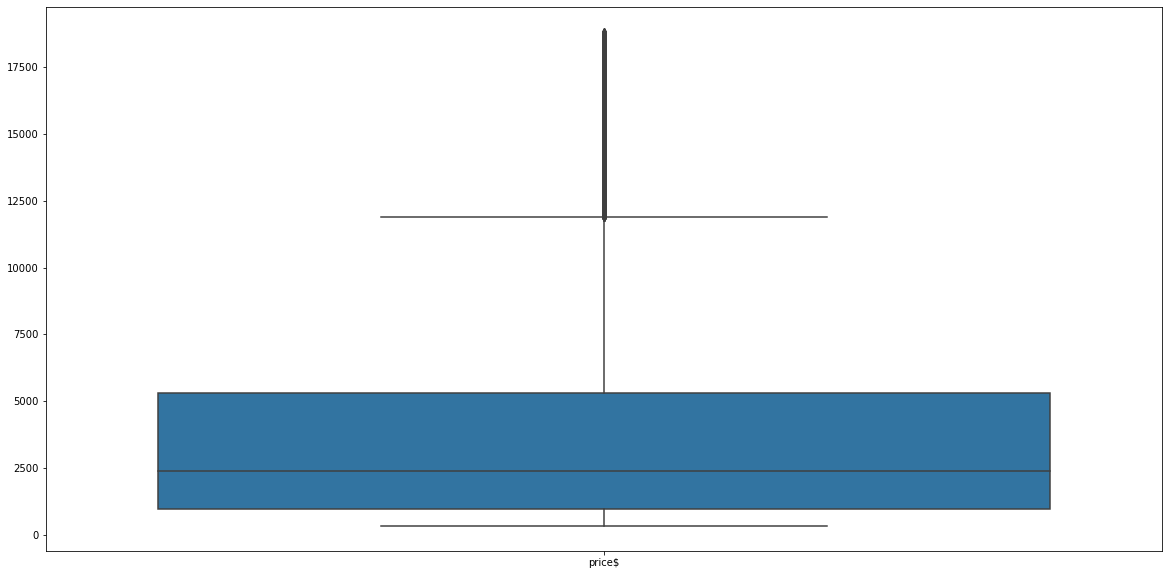

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['price$']]);

There are max outliers

##### make action delete or replace using a function 

In [21]:
diamonds = remove_outliers_max(diamonds,'price$', False)

Column is price$
Q1 is 949
Q3 is 5323
IQR is 4374
Max value is 11884
Percint of outliers is 6.55%
Actoin is change outliers values with median
 
Q1 is 949
Q3 is 4478
IQR is 3529
Max value is 9771
Percint of outliers is 3.54%
Actoin is delete outliers
 
Q1 is 928
Q3 is 4197
IQR is 3269
Max value is 9100
Percint of outliers is 1.41%
Actoin is delete outliers
 
Q1 is 919
Q3 is 4082
IQR is 3163
Max value is 8826
Percint of outliers is 0.7%
Actoin is delete outliers
 
Q1 is 915
Q3 is 4026
IQR is 3111
Max value is 8694
Percint of outliers is 0.37%
Actoin is delete outliers
 
Q1 is 912
Q3 is 3992
IQR is 3080
Max value is 8612
Percint of outliers is 0.23%
Actoin is delete outliers
 
Q1 is 911
Q3 is 3973
IQR is 3062
Max value is 8566
Percint of outliers is 0.13%
Actoin is delete outliers
 
Q1 is 911
Q3 is 3959
IQR is 3048
Max value is 8532
Percint of outliers is 0.07%
Actoin is delete outliers
 
Q1 is 911
Q3 is 3951
IQR is 3040
Max value is 8511
Percint of outliers is 0.07%
Actoin is delete out

#####  recheck on price\$ column

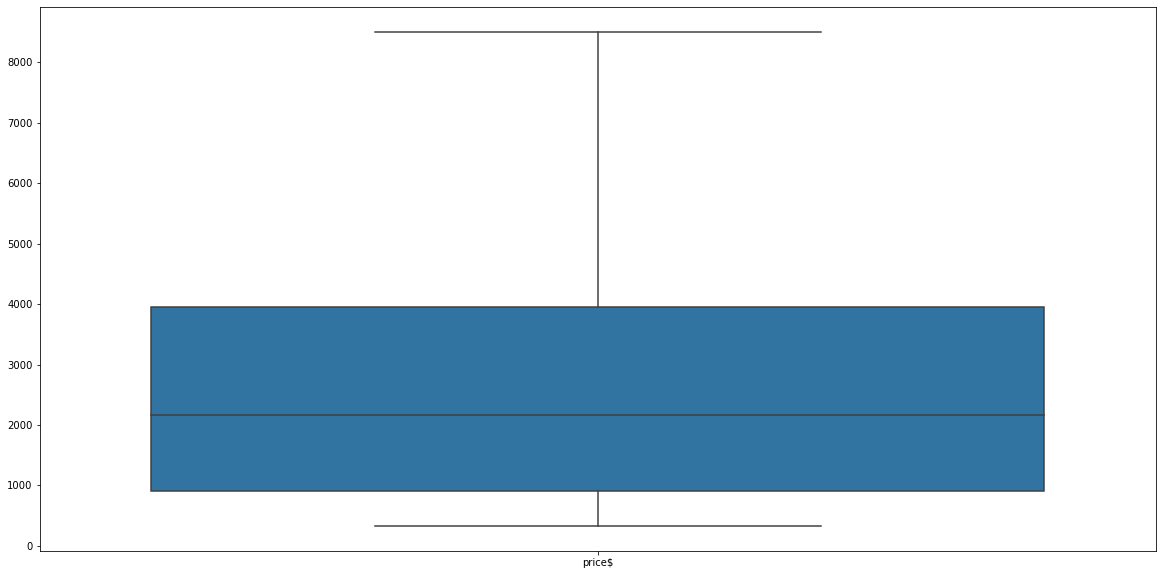

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['price$']]);

There are not outliers

##### weight_carat column

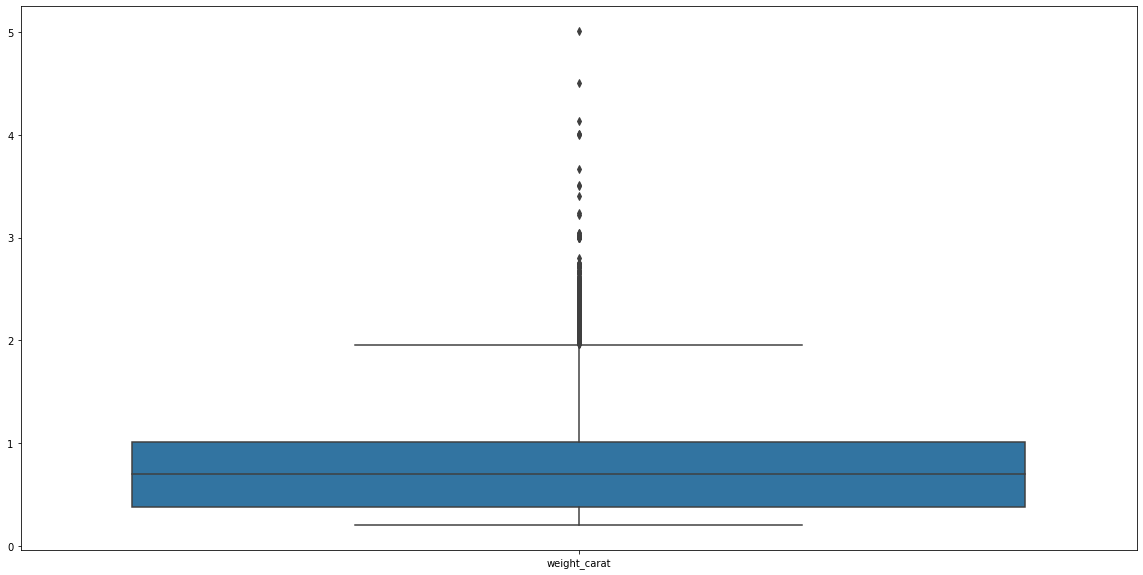

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['weight_carat']]);

There are max outliers

##### make action delete or replace using a function 

In [24]:
diamonds = remove_outliers_max(diamonds,'weight_carat')

Column is weight_carat
Q1 is 0
Q3 is 1
IQR is 0
Max value is 1
Percint of outliers is 27.94%
Actoin is change outliers values with mean
 
Q1 is 0
Q3 is 0
IQR is 0
Max value is 1


#####  recheck on weight_carat column

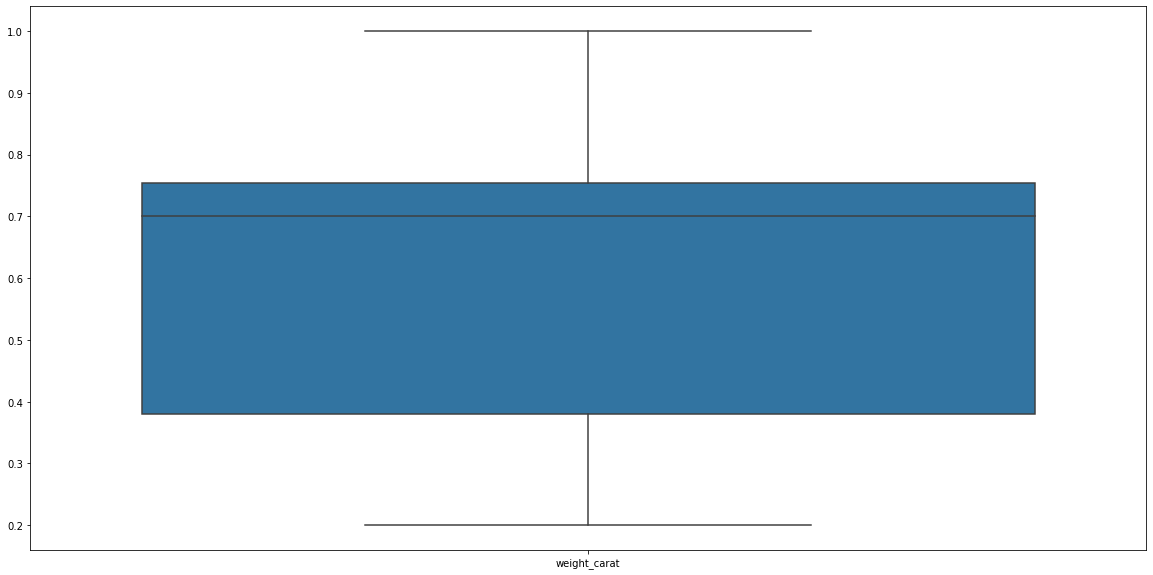

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['weight_carat']]);

There are not outliers

##### total_depth% column

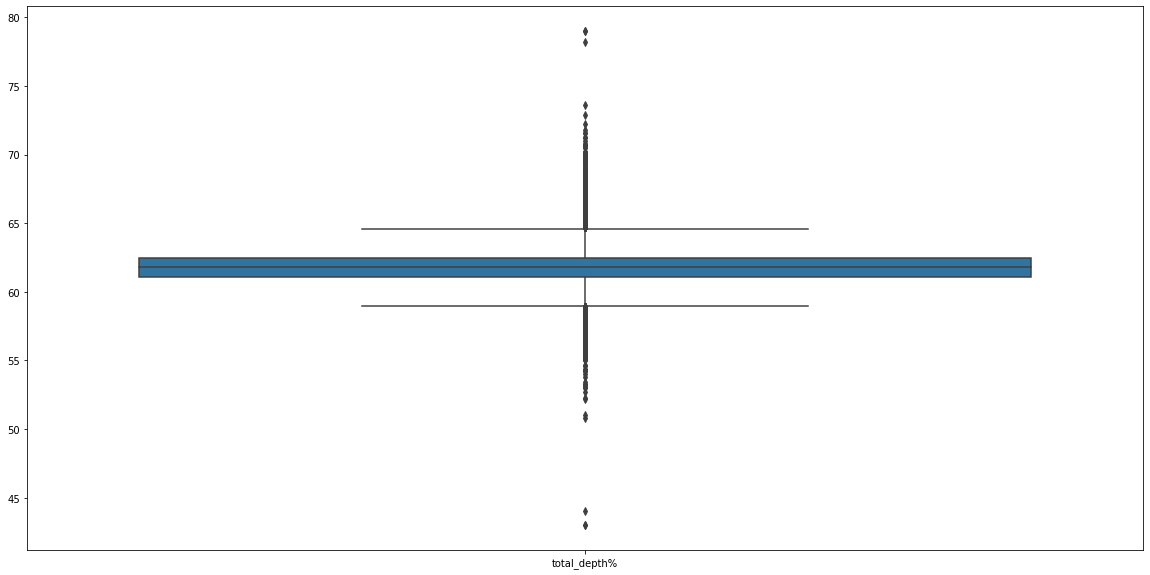

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['total_depth%']]);

There are max outliers and min outliers

##### make action delete or replace using a function 

In [29]:
diamonds = remove_outliers_max(diamonds,'total_depth%')
print(' ')
diamonds = remove_outliers_min(diamonds,'total_depth%')

Column is total_depth%
Q1 is 61
Q3 is 62
IQR is 1
Max value is 63
Percint of outliers is 10.12%
Actoin is change outliers values with mean
 
Q1 is 61
Q3 is 62
IQR is 0
Max value is 63
 
Column is total_depth%
Q1 is 61
Q3 is 62
IQR is 0
Max value is <built-in function max>
Percint of outliers is 13.84%
Actoin is change outliers values with mean
 
Q1 is 61
Q3 is 62
IQR is 0
Max value is <built-in function max>


#####  recheck on total_depth% column

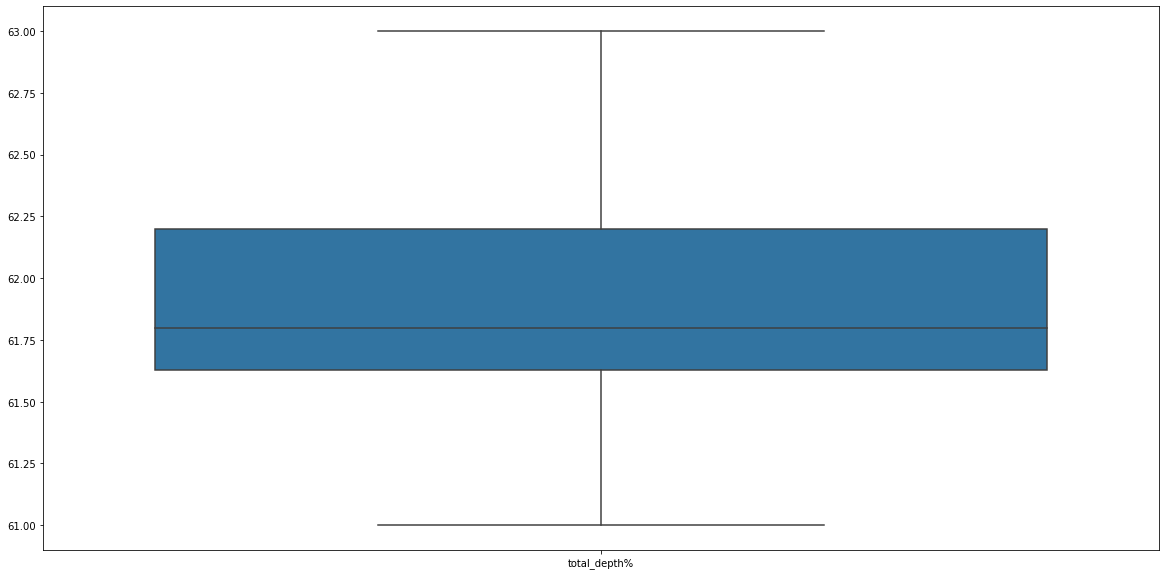

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['total_depth%']]);

There are small max outliers

##### table column

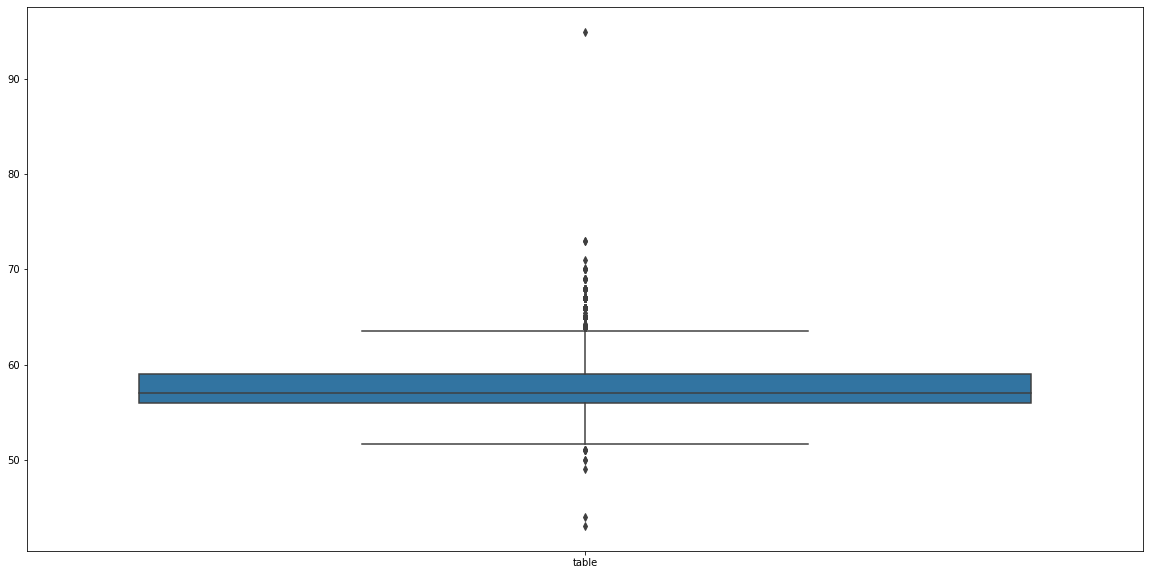

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['table']]);

There are max outliers and min outliers

##### make action delete or replace using a function 

In [32]:
diamonds = remove_outliers_max(diamonds,'table')
print(' ')
diamonds = remove_outliers_min(diamonds,'table')

Column is table
Q1 is 56
Q3 is 59
IQR is 3
Max value is 63
Percint of outliers is 1.09%
Actoin is delete outliers
 
Q1 is 56
Q3 is 59
IQR is 3
Max value is 63
 
Column is table
Q1 is 56
Q3 is 59
IQR is 3
Max value is <built-in function max>
Percint of outliers is 1.42%
Actoin is delete outliers 

 
Q1 is 56
Q3 is 59
IQR is 3
Max value is <built-in function max>


#####  recheck on table column

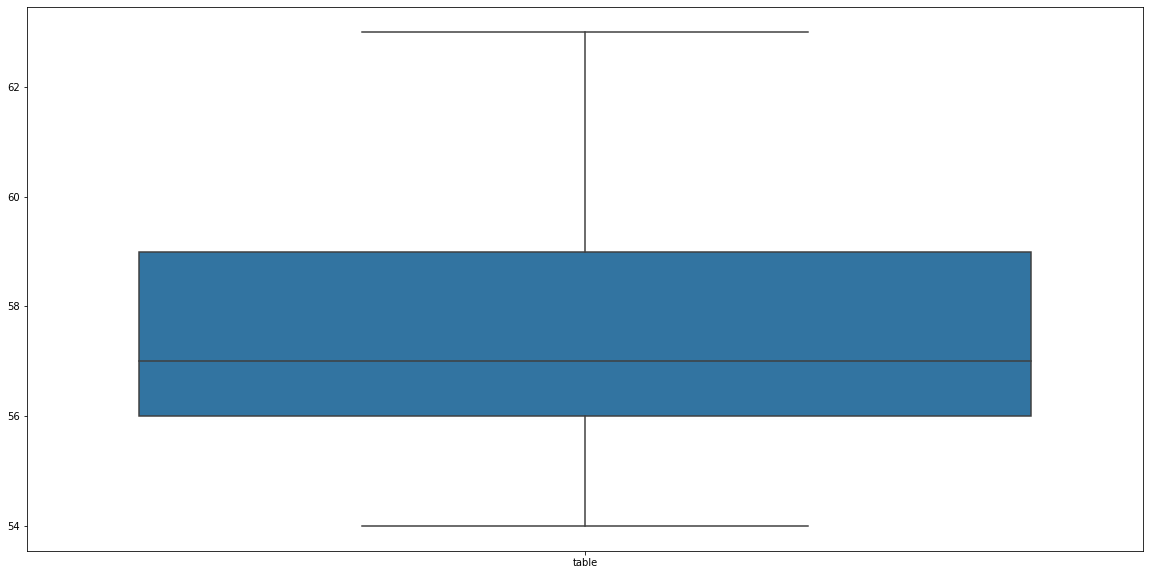

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['table']]);

There are not outliers

##### length(mm), width(mm) and depth(mm) columns

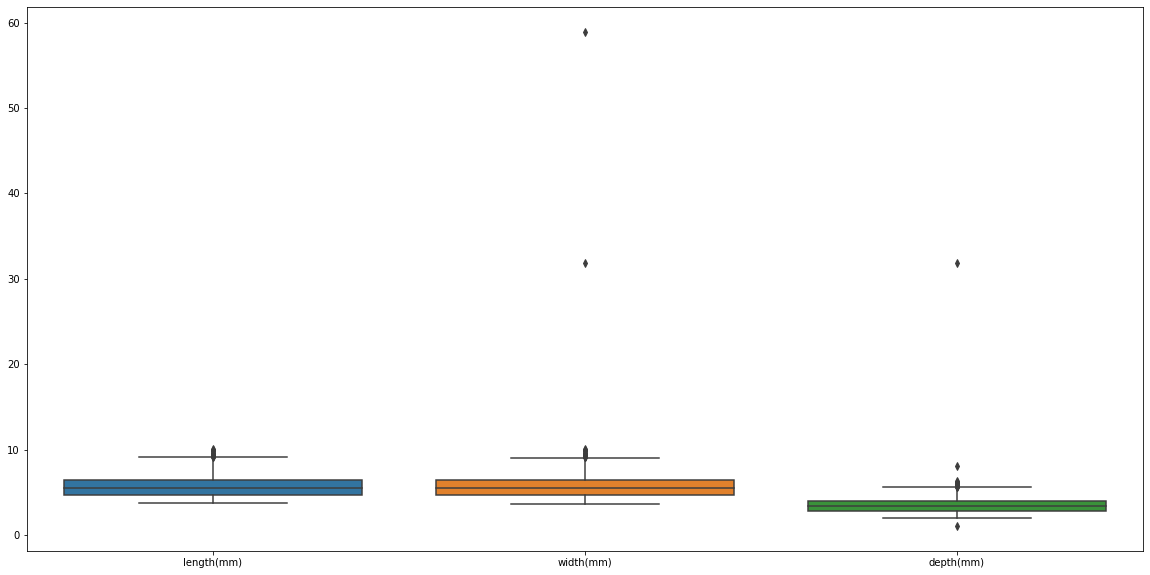

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['length(mm)','width(mm)','depth(mm)']]);

length(mm): There are max outliers<br>
width(mm): There are max outliers<br>
depth(mm): There are max outliers and min outliers

##### make action delete or replace using a function 

In [35]:
diamonds = remove_outliers_max(diamonds,'length(mm)')
print(' ')
diamonds = remove_outliers_max(diamonds,'width(mm)')
print(' ')
diamonds = remove_outliers_max(diamonds,'depth(mm)')
print(' ')
diamonds = remove_outliers_min(diamonds,'depth(mm)')

Column is length(mm)
Q1 is 4
Q3 is 6
IQR is 1
Max value is 9
Percint of outliers is 0.06%
Actoin is delete outliers
 
Q1 is 4
Q3 is 6
IQR is 1
Max value is 9
 
Column is width(mm)
Q1 is 4
Q3 is 6
IQR is 1
Max value is 9
Percint of outliers is 0.0%
Actoin is delete outliers
 
Q1 is 4
Q3 is 6
IQR is 1
Max value is 9
 
Column is depth(mm)
Q1 is 2
Q3 is 3
IQR is 1
Max value is 5
Percint of outliers is 2.37%
Actoin is delete outliers
 
Q1 is 2
Q3 is 3
IQR is 1
Max value is 5
 
Column is depth(mm)
Q1 is 2
Q3 is 3
IQR is 1
Max value is <built-in function max>
Percint of outliers is 0.0%
Actoin is delete outliers 

 
Q1 is 2
Q3 is 3
IQR is 1
Max value is <built-in function max>


#####  recheck on length(mm), width(mm) and depth(mm) columns

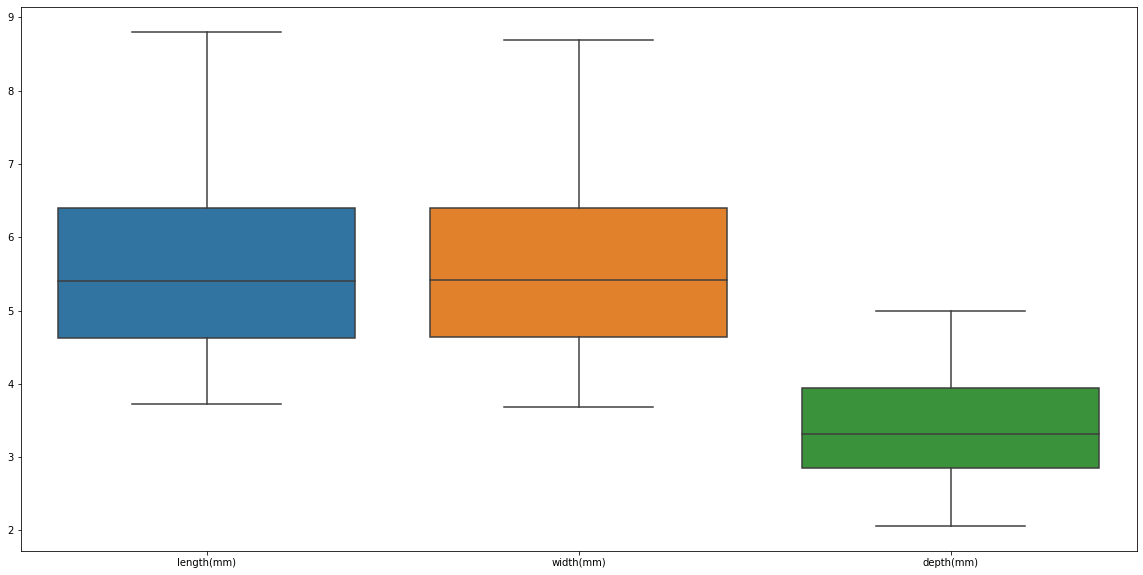

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data=diamonds[['length(mm)','width(mm)','depth(mm)']]);

There are not outliers

###### check describe of data

In [37]:
diamonds.describe()

,weight_carat,total_depth%,table,price$,length(mm),width(mm),depth(mm)
count,46340.000000,46340.000000,46340.000000,46340.000000,46340.000000,46340.000000,46340.000000
mean,0.583306,61.888000,57.397965,2624.177600,5.548037,5.552610,3.419759
std,0.210013,0.457166,2.023436,2059.089002,1.006072,0.999889,0.615408
min,0.200000,61.000000,54.000000,326.000000,3.730000,3.680000,2.060000
25%,0.370000,61.626534,56.000000,884.000000,4.630000,4.640000,2.850000
50%,0.590000,61.800000,57.000000,2005.000000,5.400000,5.410000,3.320000
75%,0.754175,62.200000,59.000000,4004.000000,6.400000,6.400000,3.950000
max,1.000000,63.000000,63.000000,8505.000000,8.800000,8.690000,5.000000


Now logical differents between 75% and max

##### check correlation

<AxesSubplot:>

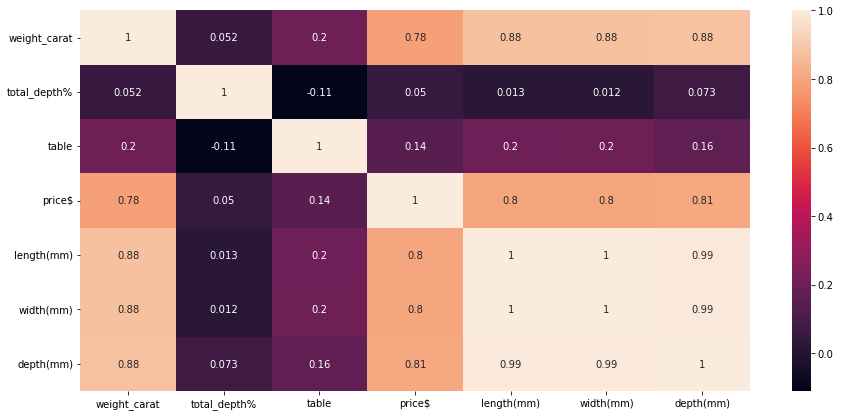

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(diamonds.corr(), annot=True)

There is Strong Positive Correlation between weight_carat, price$, length(mm), width(mm), total_depth% and depth(mm) with each other

## perpare data for modeling

##### encode string columns

In [39]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46340 entries, 1 to 53940
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight_carat  46340 non-null  float64
 1   quality       46340 non-null  object 
 2   color         46340 non-null  object 
 3   clarity       46340 non-null  object 
 4   total_depth%  46340 non-null  float64
 5   table         46340 non-null  float64
 6   price$        46340 non-null  int64  
 7   length(mm)    46340 non-null  float64
 8   width(mm)     46340 non-null  float64
 9   depth(mm)     46340 non-null  float64
 10  color_type    46340 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.2+ MB


we have 3 column to be encoded

##### encoding columns

In [40]:
diamonds = pd.get_dummies(diamonds)
diamonds.head()

,weight_carat,total_depth%,table,price$,length(mm),width(mm),depth(mm),quality_Fair,quality_Good,quality_Ideal,...,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_type_Colorless,color_type_Near colorless
1,0.23,61.500000,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0.21,61.626534,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.29,62.400000,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0.31,61.884678,58.0,335,4.34,4.35,2.75,0,1,0,...,0,0,0,1,0,0,0,0,0,1
6,0.24,62.800000,57.0,336,3.94,3.96,2.48,0,0,0,...,0,0,0,0,0,0,0,1,0,1


##### check correlation for encoded columns

<AxesSubplot:>

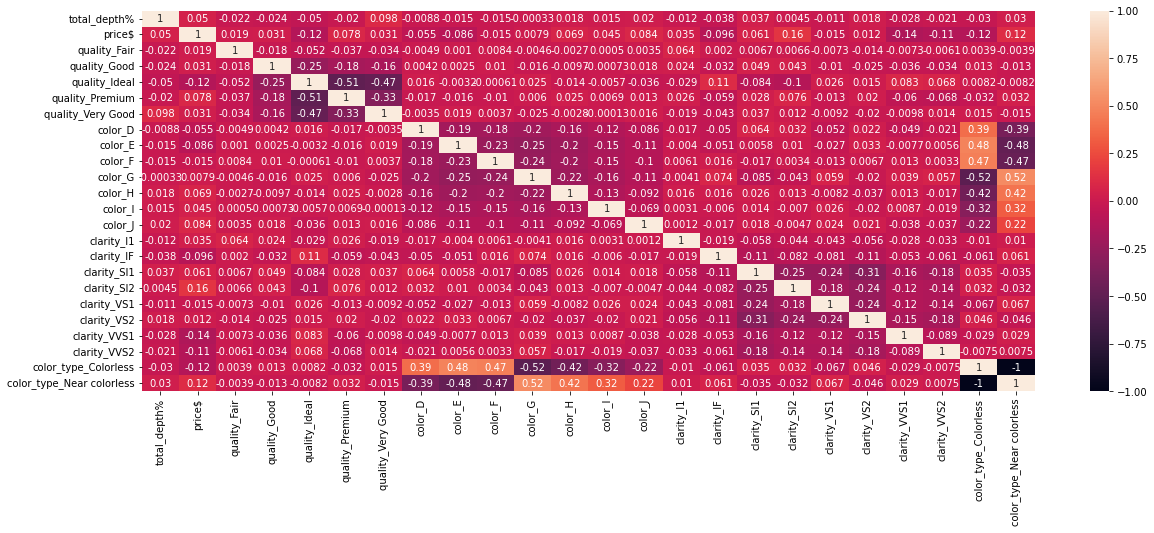

In [150]:
plt.figure(figsize=(20,7))
sns.heatmap(
    diamonds.drop([
        'weight_carat',
        'length(mm)',
        'width(mm)',
        'depth(mm)',
        'table'
    ],axis=1).corr(),
    annot=True
)

we can see there is no correlation with encoded columns and price column

## split data into train and test

##### split data into x (input) and y (output)

In [129]:
x = diamonds[['weight_carat','length(mm)','width(mm)','depth(mm)','total_depth%']]
y = diamonds['price$']

In [130]:
x.head()

,weight_carat,length(mm),width(mm),depth(mm),total_depth%
1,0.23,3.95,3.98,2.43,61.500000
2,0.21,3.89,3.84,2.31,61.626534
4,0.29,4.20,4.23,2.63,62.400000
5,0.31,4.34,4.35,2.75,61.884678
6,0.24,3.94,3.96,2.48,62.800000


##### set data into train and test

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

## Modeling

##### Linear regression object

In [132]:
lr = LinearRegression()

##### train data

In [133]:
lr.fit(x_train,y_train)

LinearRegression()

##### intercept

In [134]:
lr.intercept_

-3306.9304736367294

##### coefficients of the model

In [135]:
coef = lr.coef_
coef

array([3259.51374708,   34.2176631 ,  -74.71315001, 1778.45818489,
        -29.54831753])

In [136]:
for c in list(coef):
    print(f'For each {list(x.columns)[list(coef).index(c)]} will affect on price by {round(c,2)}')

For each weight_carat will affect on price by 3259.51
For each length(mm) will affect on price by 34.22
For each width(mm) will affect on price by -74.71
For each depth(mm) will affect on price by 1778.46
For each total_depth% will affect on price by -29.55


##### Prediction plot 

In [151]:
predict = lr.predict(x_test)

In [156]:
predict

array([ 644.97148168, 2109.09034914,  476.15693603, ..., 2054.01583092,
       3636.00417069, 3881.44987076])

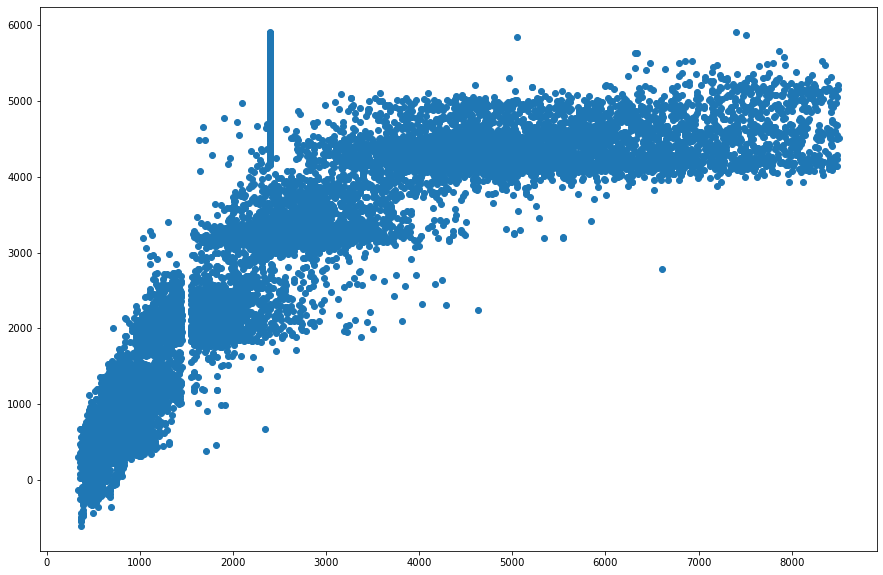

In [138]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,predict)

there is strong positive correlation between y_test and predict

## Model evalution

##### Calculate the Mean Squared Error, and the Root Mean Squared Error.

In [154]:
print(f'MSE: {mse(y_test,predict)}')
print(f'RMSE: {mse(y_test,predict, squared=False)}')

MSE: 1425470.0288550411
RMSE: 1193.9304958225337


##### score of training data

In [141]:
lr.score(x_train,y_train)

0.6765780557276393

##### score of testing data

In [152]:
lr.score(x_test,y_test)

0.6681474452752911

We see that the training data and the test data have a close score but 66% is too low 

## Testing a new model for better accuracy

##### Random Forest Regressor object

In [143]:
rf= RandomForestRegressor(n_estimators=100,min_samples_leaf=15)

##### train data

In [144]:
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=15)

##### coefficients of the model

In [157]:
fi = rf.feature_importances_
fi

array([0.03391469, 0.08562838, 0.67494184, 0.19857739, 0.00693769])

In [159]:
for c in list(fi):
    print(f'For each {list(x.columns)[list(fi).index(c)]} will affect on price by {round(c,2)}')

For each weight_carat will affect on price by 0.03
For each length(mm) will affect on price by 0.09
For each width(mm) will affect on price by 0.67
For each depth(mm) will affect on price by 0.2
For each total_depth% will affect on price by 0.01


##### Prediction plot 

In [146]:
rfc_predict=rf.predict(x_test)
rfc_predict

array([ 678.68243565, 1878.44950848,  846.08994953, ..., 1762.04802121,
       2924.01668093, 3035.45074865])

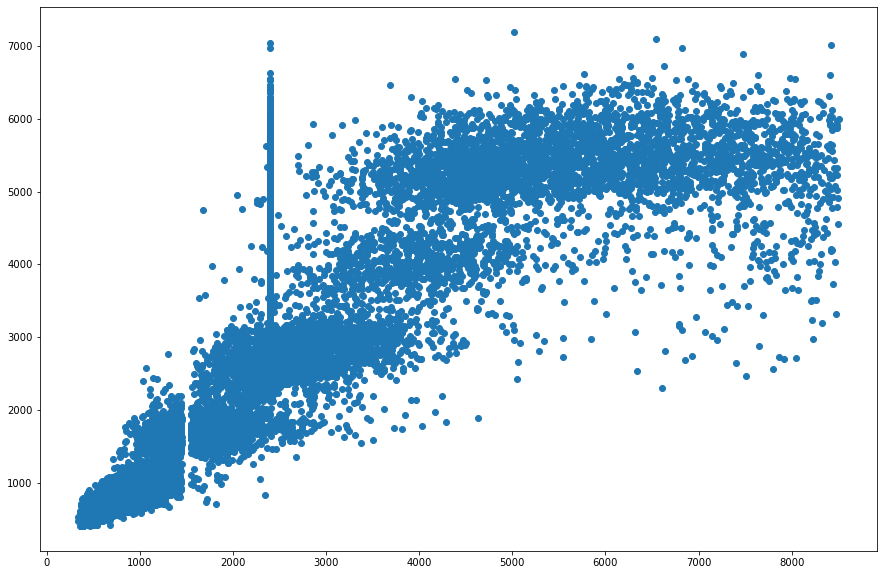

In [147]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,rfc_predict)

there is strong positive correlation between y_test and predict

##### Calculate the Mean Squared Error, and the Root Mean Squared Error.## Model evalution

##### Calculate the Mean Squared Error, and the Root Mean Squared Error.

In [155]:
print(f'MSE: {mse(y_test,rfc_predict)}')
print(f'RMSE: {mse(y_test,rfc_predict, squared=False)}')

MSE: 777077.6308270846
RMSE: 881.5200683064933


##### score of training data

In [148]:
rf.score(x_train,y_train)

0.8498582252308939

##### score of testing data

In [149]:
rf.score(x_test,y_test)

0.8190946201678323

##### wich model is better ?

In [160]:
print(f'we can say Random Forest Regressor is better model than Linear Regression model, that when Random Forest Regressor model have score on training is {round(rf.score(x_train,y_train)*100,2)}% and on testing is {round(rf.score(x_test,y_test)*100,2)}%, and Linear Regression model have score on \ntraining is {round(lr.score(x_train,y_train)*100,2)}% and on testing is {round(lr.score(x_test,y_test)*100,2)}%')

we can say Random Forest Regressor is better model than Linear Regression model, that when Random Forest Regressor model have score on training is 84.99% and on testing is 81.91%, and Linear Regression model have score on 
training is 67.66% and on testing is 66.81%


# The End 
## Thank you